## Wrangling & Analyzing [WeRateDogs™](https://twitter.com/dog_rates) Twitter Data

<span style="color: gray; font-size:1em;">Mateusz Zajac</span>
<br><span style="color: gray; font-size:1em;">Feb-2019</span>

### Part I - Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. It was started in 2015 by college student Matt Nelson, and has received international media coverage both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter.
<br>
<br>WeRateDogs asks people to send photos of their dogs, then tweets selected photos rating and a humorous comment. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". Popular posts are re-posted on Instagram and Facebook.
<br>
<br>As of December 2018, the Twitter account has nearly 7.6 million followers, The most popular post was of a dog marching in the 2017 Women's March, which was retweeted more than 50,000 times and favorited 134,000 times.
<br>
<br>WeRateDogs has successfully used the account to raise money for the American Society for the Prevention of Cruelty to Animals (ASPCA), as well as individual GoFundMe campaigns.

In [1]:
# importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_context(font_scale=1.0, rc={"lines.linewidth": 1.3})
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,tweet_datetime,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage,favorite_count,retweet_count,prediction_picture,prediction_breed,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Unknown,38126,8339,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Unknown,32703,6162,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Unknown,24623,4078,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,Unknown,41473,8484,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,Unknown,39639,9168,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                 1993 non-null int64
tweet_datetime           1993 non-null object
tweet_source             1993 non-null object
tweet_content            1993 non-null object
tweet_url                1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
dog_name                 1993 non-null object
dog_stage                1993 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
prediction_picture       1993 non-null object
prediction_breed         1685 non-null object
prediction_confidence    1685 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 218.1+ KB


In [4]:
# set datapoints to their appropriate types
df['tweet_id'] = df['tweet_id'].astype(object)
df['tweet_datetime'] = pd.to_datetime(df.tweet_datetime)
df['tweet_source'] = df['tweet_source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

In [5]:
# subsetting year from the tweet timestamp
df['year'] = pd.DatetimeIndex(df.tweet_datetime).year

In [6]:
# increase the width of colums so the text is fully displayed
pd.set_option('display.max_colwidth', -1)

In [7]:
# check the most liked tweet
print(df[df.favorite_count > (df.favorite_count.max()-1)]['tweet_url'])

774    https://twitter.com/dog_rates/status/744234799360020481/video/1
Name: tweet_url, dtype: object


In [8]:
# retrieving the data related to the most liked tweet
df.iloc[[1726]]

,tweet_id,tweet_datetime,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage,favorite_count,retweet_count,prediction_picture,prediction_breed,prediction_confidence,year
1726,670811965569282048,2015-11-29 03:50:10+00:00,Twitter for iPhone,Meet Maggie. She enjoys her stick in the yard. Very content. Much tranquility. 10/10 keep it up pup https://t.co/eYP9i9gfYn,https://twitter.com/dog_rates/status/670811965569282048/photo/1,10.0,10.0,Maggie,Unknown,1154,277,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,Basset,0.99409,2015


In [9]:
df.index=df['tweet_datetime']

In [10]:
# replace 'None' dog names with NaN
df['dog_name'].replace('None', np.nan, inplace=True)

### Part II - Top 10 Dog Names and Dog Breeds

There is a variety of dog names but four of them are the most popular: **Cooper, Lucy, Oliver and Charlie** which repeated 10 times.
<br>
<br>**Golden Retriever** is the most popular breed on WeRateDogs. This breed has an unassailable lead in the ranking. There is not much of a surprise as both Labrador and Golden Retriever are also in the top of in the most popular dog breeds in the World.

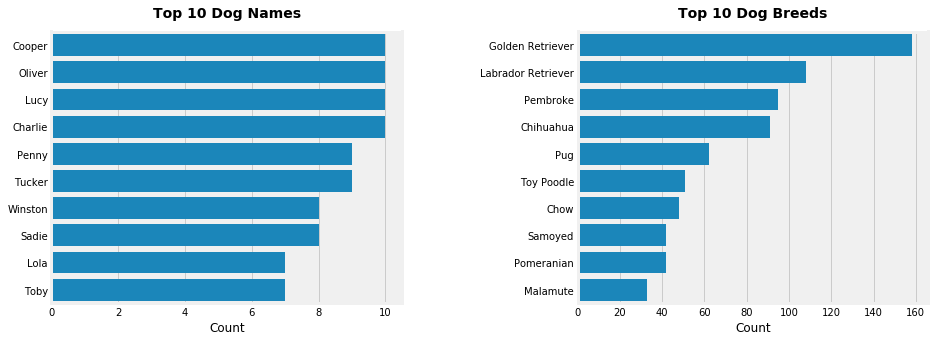

In [11]:
# code for top 10 dog names and dog breeds

fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5)
fig.set_size_inches(w=14,h=5)

basic_color = sns.color_palette()[0]

ax1 = sns.countplot(data=df, y=df.dog_name, order=df.dog_name.value_counts().iloc[:10].index,
            color = basic_color, ax=ax[0])
ax2 = sns.countplot(data=df, y=df.prediction_breed, order=df.prediction_breed.value_counts().iloc[:10].index,
            color = basic_color, ax=ax[1])

# set titles for each plot
ax1.set_title('Top 10 Dog Names', y=1.03, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})
ax2.set_title('Top 10 Dog Breeds', y=1.03, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})

# set X labels for each plot
ax1.set_xlabel('Count')
ax2.set_xlabel('Count')

# set Y labels for each plot
ax1.set_ylabel('')
ax2.set_ylabel('')

fig.show();

### Part III - The most liked and retweeted dog in the dataset

The most retweeted and at the same time the most favourite dog in the dataset is a sweet Labrador Retriever who just figured out he can stand in the pool. The dog was rated 13/10 with the comment "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4".
<br>
<br>The tweet was retweeted 83,874 times and liked by 164,611 people.
<br>Here is the YT video of this sweety:
<br>
<center><iframe width="560" height="315" src="https://www.youtube.com/embed/kGc2uMneECs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>

### Part IV - Dogs are getting more likes and retweets

Right from the start in November 2015, WeRateDogs started gaining popularity (Who does not love dogs?), the number of retweets and likes growed intensively in the first months. After the initial period the growth stabilized, but is still positive. As we can see, number of retweets and likes are highly correlated (0.93), most probably due to the fact that the original tweets reached more people. The account has currently more than 7.5M followers.

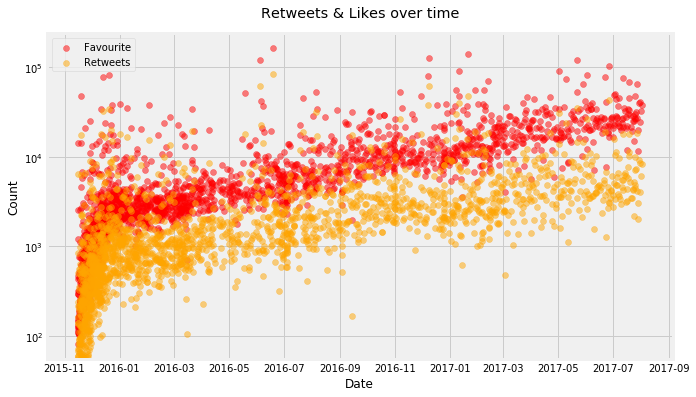

In [12]:
# code for Rating and Favourite over years

plt.rcParams['figure.figsize'] = (10, 6)

plt.scatter(df.tweet_datetime, df.favorite_count, c='red', alpha=0.5, label='Favourite')
plt.scatter(df.tweet_datetime, df.retweet_count, c='orange', alpha=0.5, label='Retweets')
plt.title('Retweets & Likes over time', y=1.03)
plt.xlabel("Date")
plt.ylabel("Count")
plt.yscale("log")
plt.legend();

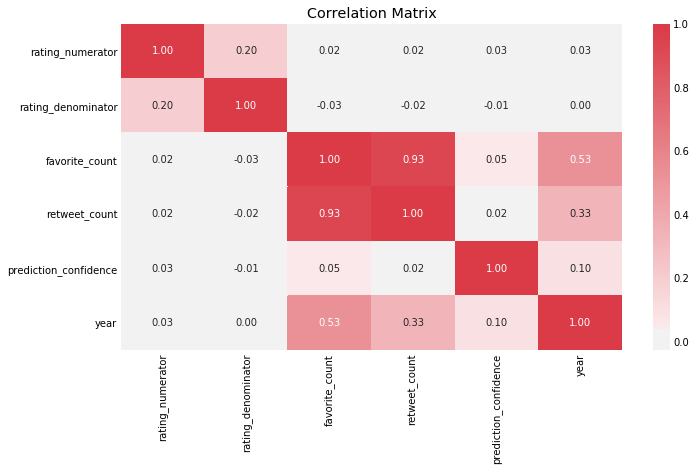

In [13]:
# code for the Correlation Matrix

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap, center = 0)
plt.title('Correlation Matrix');

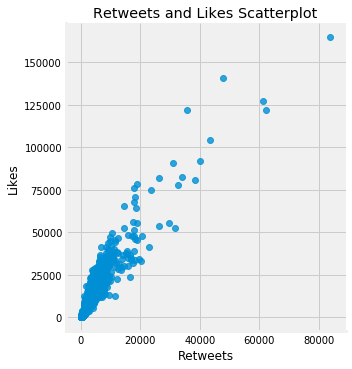

In [14]:
# code for Favourite vs Retweet count scatterplot

sns.lmplot(data=df, x="retweet_count", y="favorite_count", fit_reg=False)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Retweets and Likes Scatterplot');

### Part V - Dogs are getting greater ratings

The out of 1-10 scale rating system is an important part of the WeRateDogs. Dogs are usually rated higher than 10 and rates increased over years from about 9.3 in 2015 to 12.5 in 2017.
<br>
<br>**The ratings below 10 almost disappeared after the famous exchange with the Twitter user Brant:**
<br>On September 12th, 2016, Twitter user @brant took issue with the account's rating system, tweeting @dog_rates to tell them it didn't make any sense. @dog_rates replied with "they're good dogs Brent," purposefully misspelling @brant's name.
<br>
<img src="https://i.kym-cdn.com/photos/images/original/001/225/812/2b3.png" alt="They're Good Dogs Brent" style="width:450px;height:400px;">

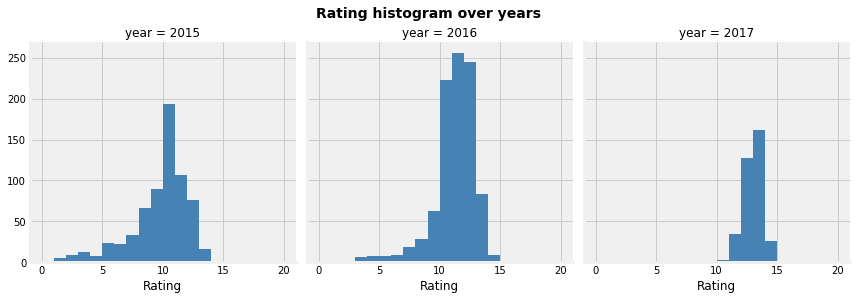

In [15]:
# code for Rating histogram over years

g = sns.FacetGrid(df, col="year", margin_titles=True, col_wrap=3, size=4)
bins = np.arange(0, 20+1, 1)
g.map(plt.hist, "rating_numerator", color="steelblue", bins=bins).set_axis_labels("Rating")
g.fig.suptitle('Rating histogram over years', y=1.03, fontsize=14, fontweight='semibold');

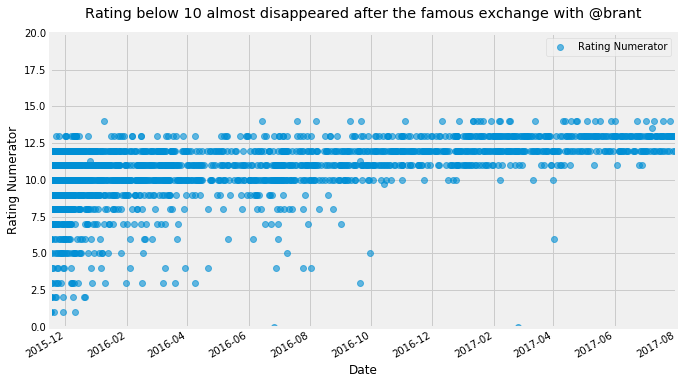

In [16]:
# code for Rating Numerator (disregarding outliers)

df.plot(y ='rating_numerator', ylim=[0,20], style = 'o', alpha = 0.6, label='Rating Numerator')
plt.title('Rating below 10 almost disappeared after the famous exchange with @brant', y=1.03)
plt.xlabel('Date')
plt.ylabel('Rating Numerator')
plt.legend();

### Part VI - Conclusion

History of WeRateDogs Twitter account as quite exceptional. It had exponential growth from the begining, started (and continued) as a fun account rating cute dogs and developed to a serious business (publishing books, games, having an online store).
<br>
<br> The dataset that I have been investigating is quite interesting and I believe I could have spent more time to look for more insights like for instance which dog breeds or dog stages get the most retweets and likes. Anyway, I learned a lot working on this project and it reinforced in me the importance of data wrangling before analyzing data. 